<center><h2>R Programming</h2></center>
<center><h2>[Exploratory Data Analytics and Shallow Machine Learning Modeling]</h2></center>

## Import libraries

In [1]:
library(ggplot2)
library(randomForest)
library(caTools)
library(randomForest)
library(e1071) #SVR
library(caret)
library(rpart)
library(corrplot)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: lattice

corrplot 0.92 loaded



## Load data

In [2]:
mydata = read.csv("data_features_selected.csv")  # read csv file 

In [3]:
summary(mydata)

       X           longitude         latitude      planting_year 
 Min.   : 3416   Min.   : 3.540   Min.   : 7.300   Min.   :1982  
 1st Qu.:45736   1st Qu.: 7.436   1st Qu.: 9.338   1st Qu.:2017  
 Median :46369   Median : 7.789   Median :10.269   Median :2017  
 Mean   :43040   Mean   : 8.285   Mean   :10.064   Mean   :2017  
 3rd Qu.:48168   3rd Qu.: 9.141   3rd Qu.:10.623   3rd Qu.:2017  
 Max.   :61021   Max.   :11.715   Max.   :12.563   Max.   :2017  
   variety          N_fertilizer       P_fertilizer        K_fertilizer   
 Length:2327        Length:2327        Length:2327        Min.   :  0.00  
 Class :character   Class :character   Class :character   1st Qu.:  0.00  
 Mode  :character   Mode  :character   Mode  :character   Median : 12.45  
                                                          Mean   : 14.71  
                                                          3rd Qu.: 18.67  
                                                          Max.   :120.00  
 Avg_Annual_R

## Visualize fertilizer variable: Highly skewed therefore will be dropped

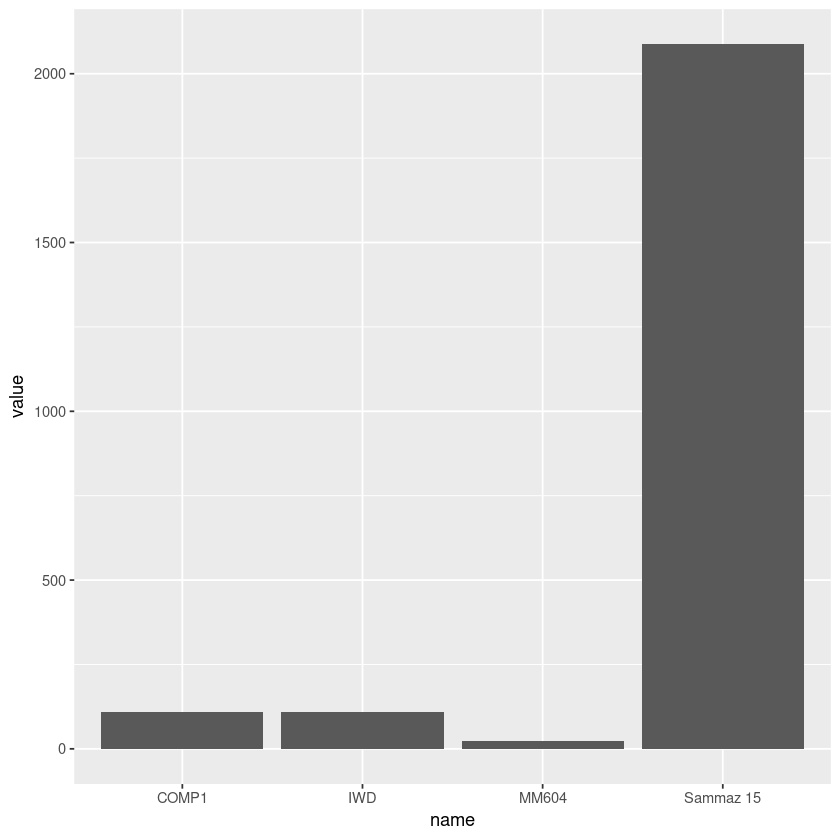

In [6]:
#Create data
data2 <- data.frame(
    name=c("COMP1","IWD","MM604","Sammaz 15"),
    value=c(108,108,24,2087)
)
# Barplot
ggplot(data2, aes(x=name, y=value)) + 
  geom_bar(stat = "identity")

## Features selection

In [7]:
df = subset(mydata, select = -c(X,longitude,latitude,planting_year,variety))

In [8]:
dim(df)

[1] 2327    6

In [9]:
summary(df)

 N_fertilizer       P_fertilizer        K_fertilizer    Avg_Annual_Rainfall
 Length:2327        Length:2327        Min.   :  0.00   Min.   :  756      
 Class :character   Class :character   1st Qu.:  0.00   1st Qu.: 1079      
 Mode  :character   Mode  :character   Median : 12.45   Median : 1242      
                                       Mean   : 14.71   Mean   : 1435      
                                       3rd Qu.: 18.67   3rd Qu.: 1305      
                                       Max.   :120.00   Max.   :18084      
 Avg_Annual_Temp     yield      
 Min.   :22.36   Min.   :    0  
 1st Qu.:25.78   1st Qu.: 1830  
 Median :26.29   Median : 3024  
 Mean   :26.40   Mean   : 3245  
 3rd Qu.:27.48   3rd Qu.: 4410  
 Max.   :28.81   Max.   :11298  

## Convert columns to numerical values

In [10]:
df_temp = as.numeric(as.character(df$N_fertilizer))
df$N_fertilizer <- df_temp

df_temp = as.numeric(as.character(df$P_fertilizer))
df$P_fertilizer <- df_temp

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [11]:
summary(df)

  N_fertilizer    P_fertilizer     K_fertilizer    Avg_Annual_Rainfall
 Min.   : 0.00   Min.   : 0.000   Min.   :  0.00   Min.   :  756      
 1st Qu.:14.00   1st Qu.: 6.550   1st Qu.:  0.00   1st Qu.: 1079      
 Median :46.00   Median : 9.825   Median : 12.45   Median : 1242      
 Mean   :40.97   Mean   : 9.606   Mean   : 14.71   Mean   : 1435      
 3rd Qu.:67.00   3rd Qu.:13.755   3rd Qu.: 18.67   3rd Qu.: 1305      
 Max.   :68.50   Max.   :20.306   Max.   :120.00   Max.   :18084      
 NA's   :216     NA's   :216                                          
 Avg_Annual_Temp     yield      
 Min.   :22.36   Min.   :    0  
 1st Qu.:25.78   1st Qu.: 1830  
 Median :26.29   Median : 3024  
 Mean   :26.40   Mean   : 3245  
 3rd Qu.:27.48   3rd Qu.: 4410  
 Max.   :28.81   Max.   :11298  
                                

## Drop all the null values

In [12]:
df <- na.omit(df)

In [13]:
summary(df)

  N_fertilizer    P_fertilizer     K_fertilizer   Avg_Annual_Rainfall
 Min.   : 0.00   Min.   : 0.000   Min.   : 0.00   Min.   :  756      
 1st Qu.:14.00   1st Qu.: 6.550   1st Qu.: 0.00   1st Qu.: 1078      
 Median :46.00   Median : 9.825   Median :12.45   Median : 1242      
 Mean   :40.97   Mean   : 9.606   Mean   :10.08   Mean   : 1323      
 3rd Qu.:67.00   3rd Qu.:13.755   3rd Qu.:18.67   3rd Qu.: 1278      
 Max.   :68.50   Max.   :20.306   Max.   :27.38   Max.   :18084      
 Avg_Annual_Temp     yield      
 Min.   :22.36   Min.   :   86  
 1st Qu.:26.04   1st Qu.: 1956  
 Median :26.29   Median : 3093  
 Mean   :26.48   Mean   : 3354  
 3rd Qu.:27.57   3rd Qu.: 4576  
 Max.   :28.81   Max.   :11298  

In [14]:
dim(df)

[1] 2111    6

## Visualize distribution of features selected

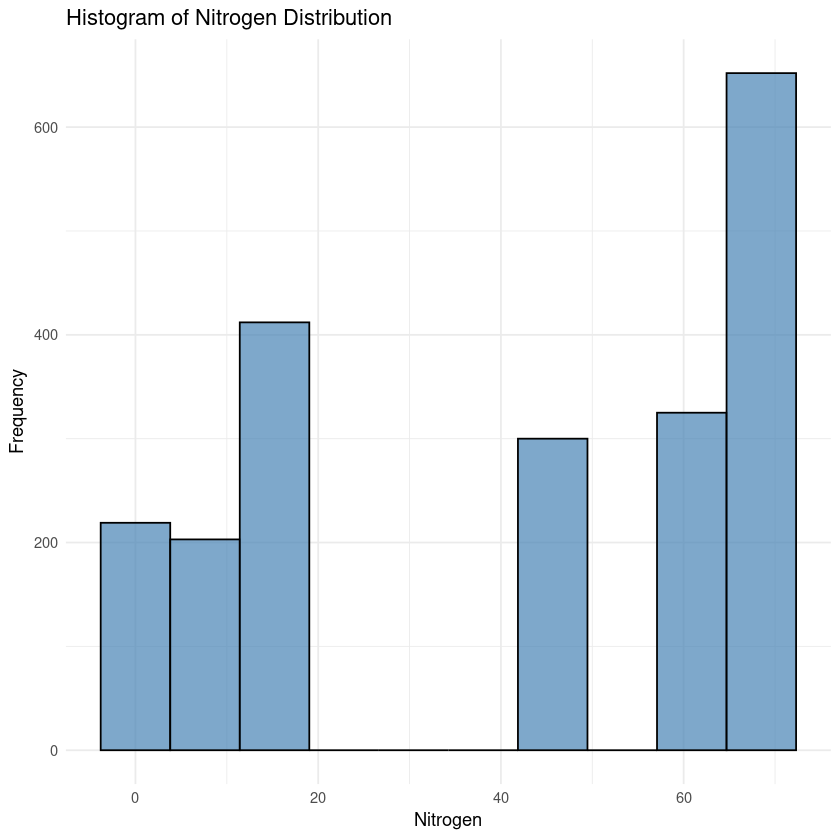

In [15]:
# Basic histogram with a border color
ggplot(df, aes(x = N_fertilizer)) +
  geom_histogram(color = "black", fill = "steelblue", bins = 10, alpha = 0.7) +
  labs(x = "Nitrogen", y = "Frequency") +
  ggtitle("Histogram of Nitrogen Distribution") +
  theme_minimal()

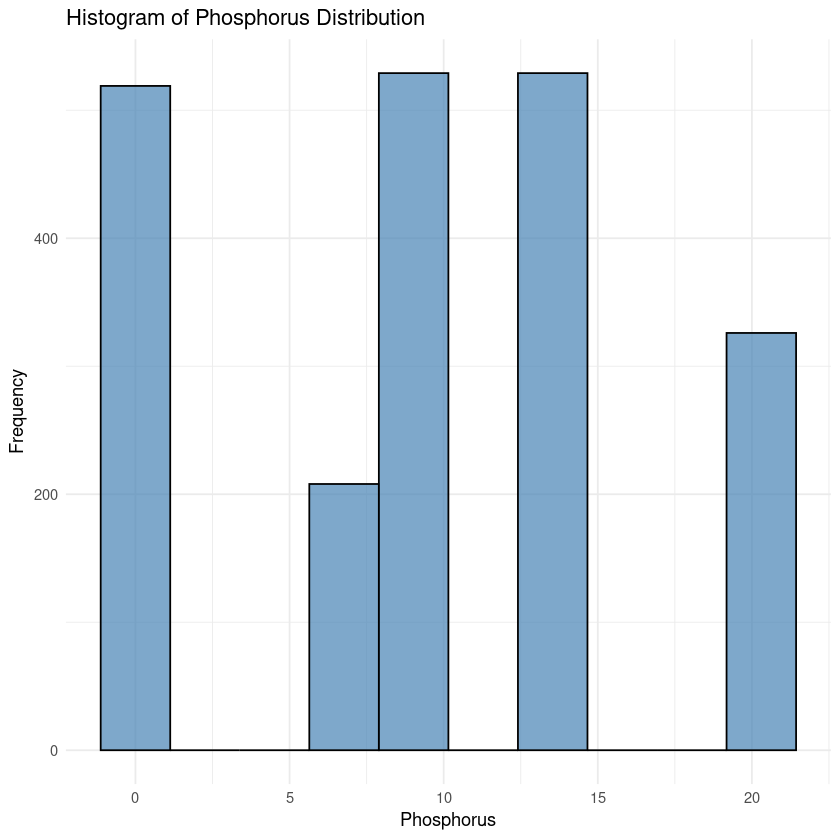

In [16]:
# Basic histogram with a border color
ggplot(df, aes(x = P_fertilizer)) +
  geom_histogram(color = "black", fill = "steelblue", bins = 10, alpha = 0.7) +
  labs(x = "Phosphorus", y = "Frequency") +
  ggtitle("Histogram of Phosphorus Distribution") +
  theme_minimal()

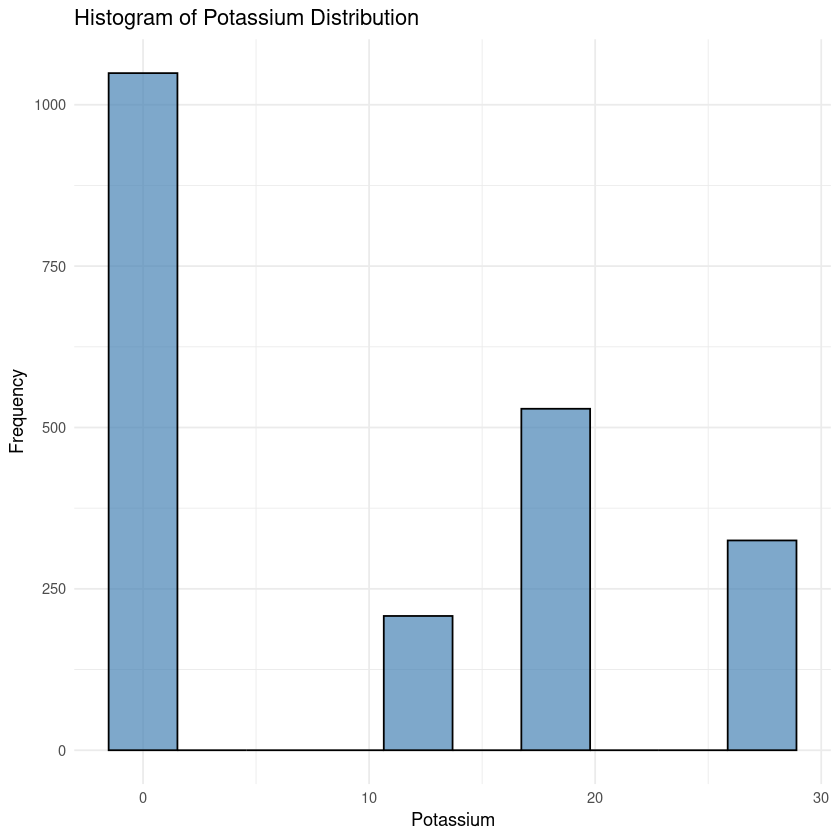

In [19]:
# Basic histogram with a border color
ggplot(df, aes(x = K_fertilizer)) +
  geom_histogram(color = "black", fill = "steelblue", bins = 10, alpha = 0.7) +
  labs(x = "Potassium", y = "Frequency") +
  ggtitle("Histogram of Potassium Distribution") +
  theme_minimal()

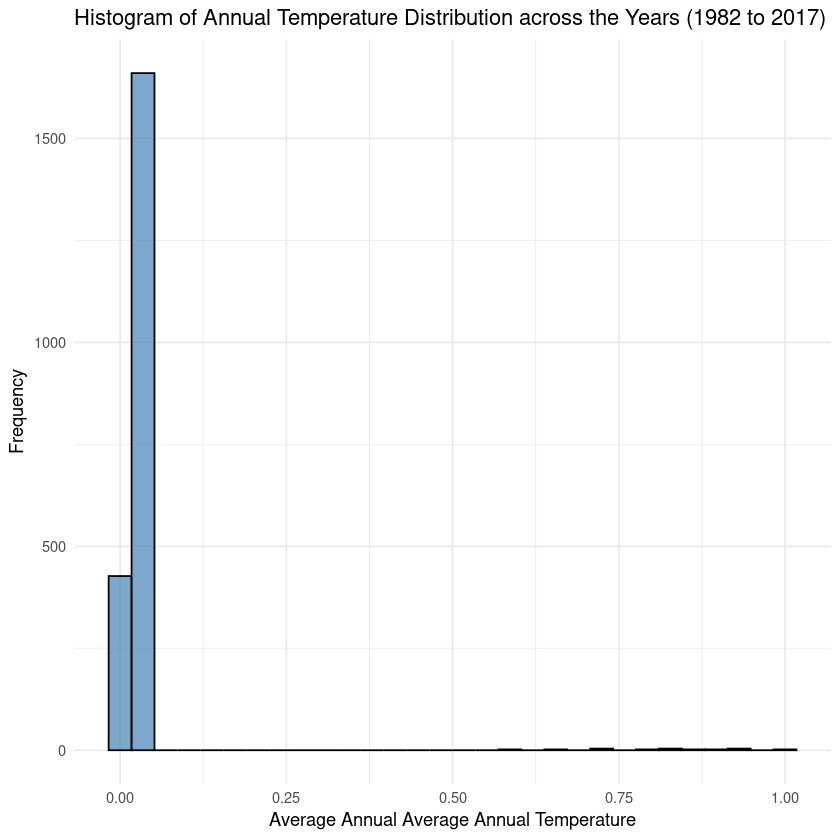

In [48]:
# Basic histogram with a border color
ggplot(df, aes(x = Avg_Annual_Rainfall)) +
  geom_histogram(color = "black", fill = "steelblue", bins = 30, alpha = 0.7) +
  labs(x = "Average Annual Average Annual Temperature", y = "Frequency") +
  ggtitle("Histogram of Annual Temperature Distribution across the Years (1982 to 2017)") +
  theme_minimal()

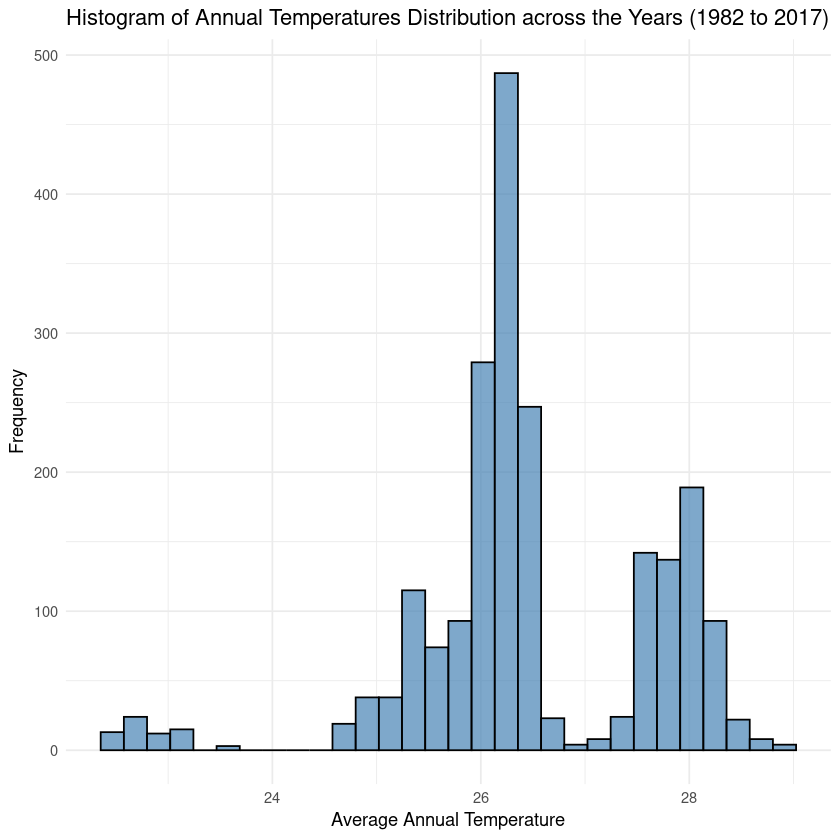

In [21]:
# Basic histogram with a border color
ggplot(df, aes(x = Avg_Annual_Temp)) +
  geom_histogram(color = "black", fill = "steelblue", bins = 30, alpha = 0.7) +
  labs(x = "Average Annual Temperature", y = "Frequency") +
  ggtitle("Histogram of Annual Temperatures Distribution across the Years (1982 to 2017)") +
  theme_minimal()

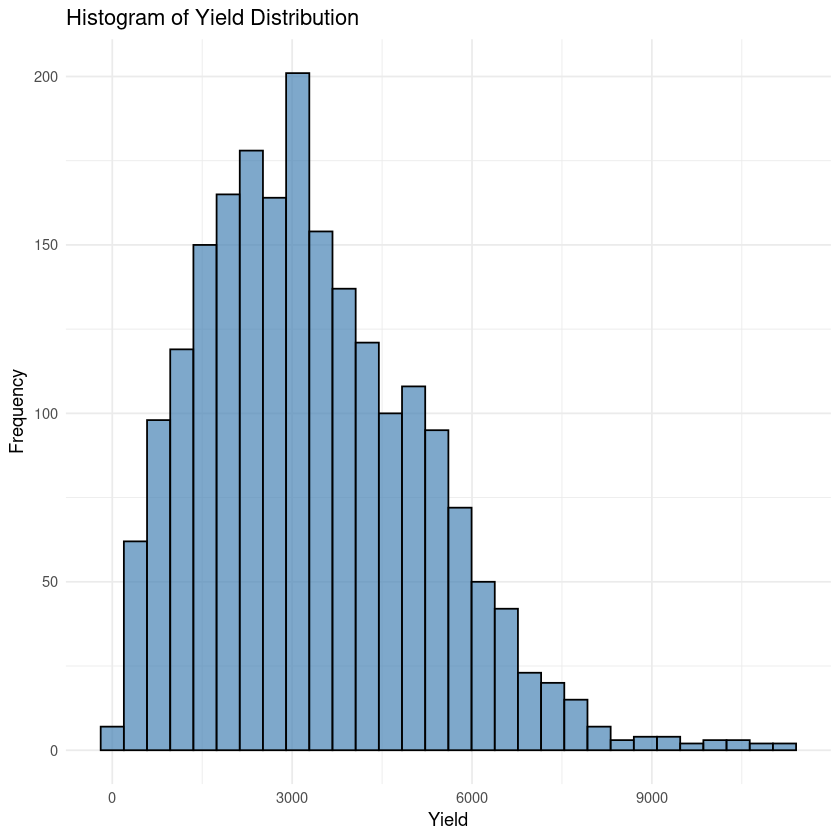

In [22]:
# Basic histogram with a border color
ggplot(df, aes(x = yield)) +
  geom_histogram(color = "black", fill = "steelblue", bins = 30, alpha = 0.7) +
  labs(x = "Yield", y = "Frequency") +
  ggtitle("Histogram of Yield Distribution") +
  theme_minimal()

## Correlation matrix of selected features

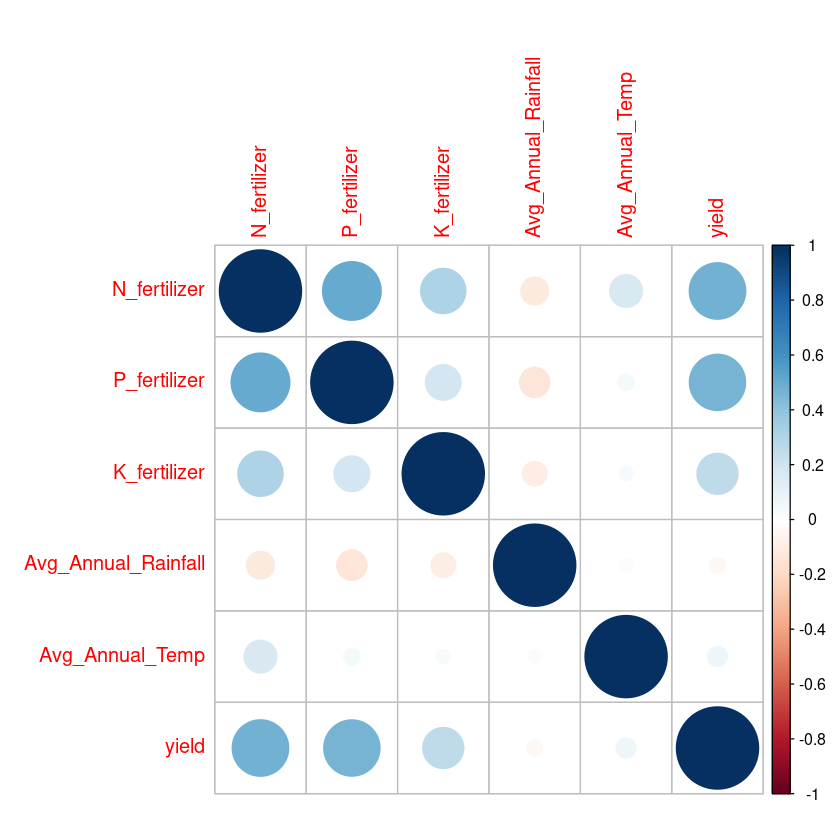

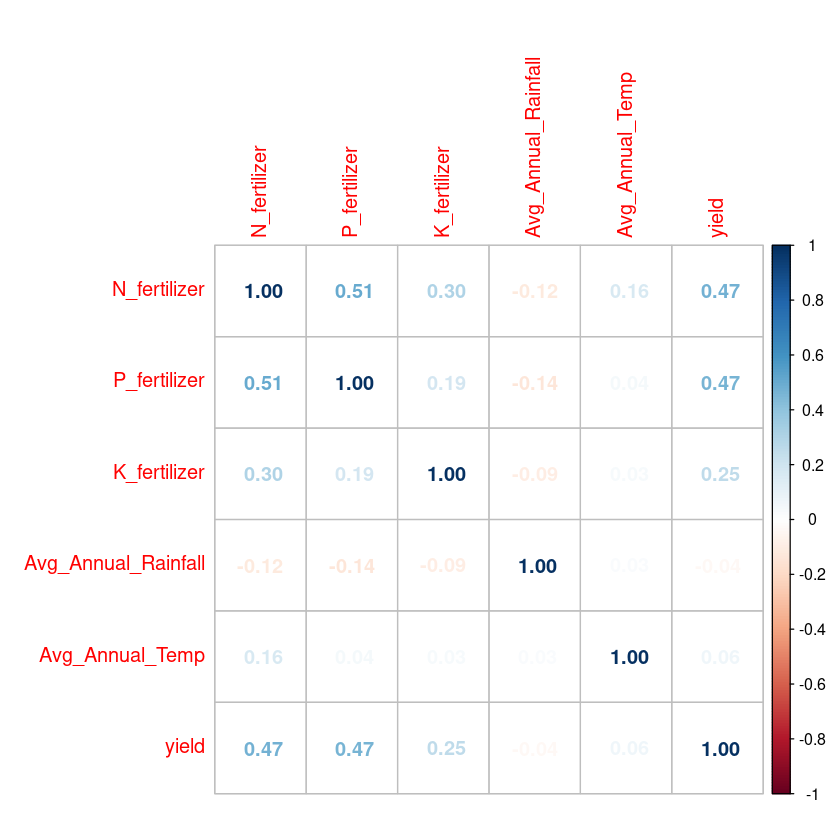

In [23]:
corr_matrix <-cor(df)
 
# visualizing correlogram
# as circle
corrplot(corr_matrix, method="circle")
 
# as number
corrplot(corr_matrix, method="number")

## Normalise machine ready data 

In [24]:
process <- preProcess(as.data.frame(df), method=c("range"))
df <- predict(process, as.data.frame(df))
summary(df)

  N_fertilizer     P_fertilizer     K_fertilizer    Avg_Annual_Rainfall
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000    
 1st Qu.:0.2044   1st Qu.:0.3226   1st Qu.:0.0000   1st Qu.:0.01858    
 Median :0.6715   Median :0.4839   Median :0.4545   Median :0.02805    
 Mean   :0.5981   Mean   :0.4731   Mean   :0.3681   Mean   :0.03274    
 3rd Qu.:0.9781   3rd Qu.:0.6774   3rd Qu.:0.6818   3rd Qu.:0.03012    
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000    
 Avg_Annual_Temp      yield       
 Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.5705   1st Qu.:0.1668  
 Median :0.6093   Median :0.2682  
 Mean   :0.6393   Mean   :0.2914  
 3rd Qu.:0.8078   3rd Qu.:0.4005  
 Max.   :1.0000   Max.   :1.0000  

## Splitting data to train and test

In [25]:
split <- sample.split(df, SplitRatio = 0.8) 
split 

[1]  TRUE  TRUE  TRUE FALSE FALSE  TRUE

In [26]:
data_train <- subset(df, split == "TRUE")
data_test <- subset(df, split == "FALSE")

In [27]:
dim(data_train) # dimension/shape of train dataset

[1] 1407    6

In [28]:
dim(data_test)  # dimension/shape of test dataset

[1] 704   6

## Machine learning training: Random Forest Regressor

### Train

In [30]:
modelRF <- randomForest(data_train$yield ~ ., data=data_train, ntree=100, keep.forest=TRUE, importance=TRUE, type="regression", metric = "rmse")
modelRF 


Call:
 randomForest(formula = data_train$yield ~ ., data = data_train,      ntree = 100, keep.forest = TRUE, importance = TRUE, type = "regression",      metric = "rmse") 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 1

          Mean of squared residuals: 0.01520637
                    % Var explained: 44.4

### Predict

In [31]:
pred_RF <- predict(modelRF, newdata=data_test)

### Evaluation: using root mean squared error (RMSE)

In [32]:
RMSE_RF = sqrt(mean((pred_RF-data_test$yield)^2))
print(RMSE_RF)

[1] 0.1229232


### Plot the error vs the number of trees graph 

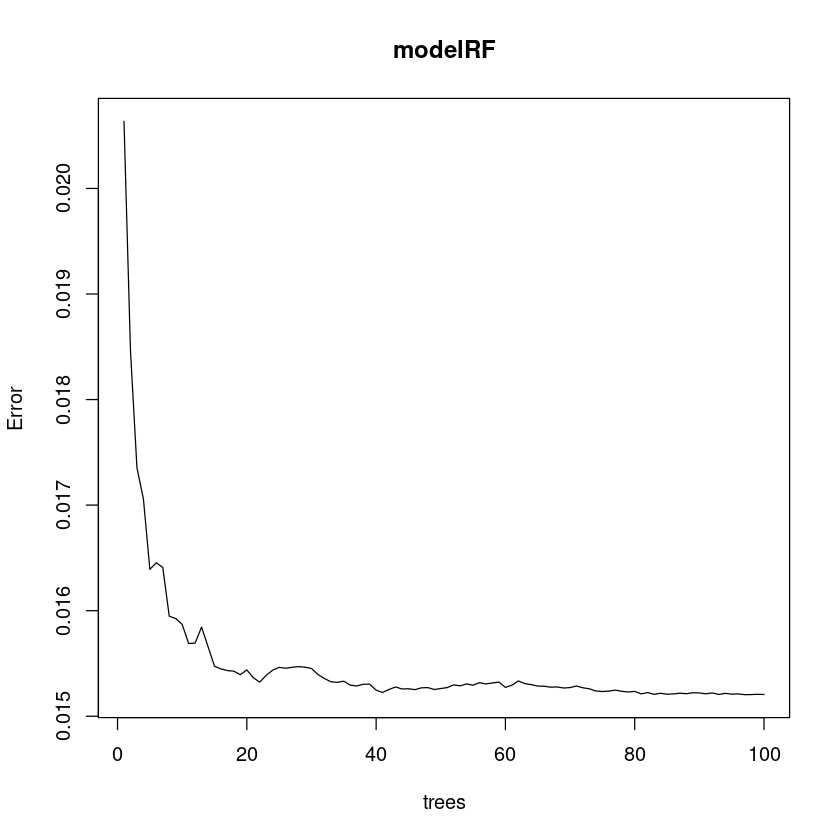

In [33]:
plot(modelRF) 

### Variable/feature importance

,%IncMSE,IncNodePurity
N_fertilizer,11.272706,4.626253
P_fertilizer,10.200740,3.636032
K_fertilizer,6.825878,1.558408
Avg_Annual_Rainfall,13.752811,4.460615
Avg_Annual_Temp,10.900581,2.870297


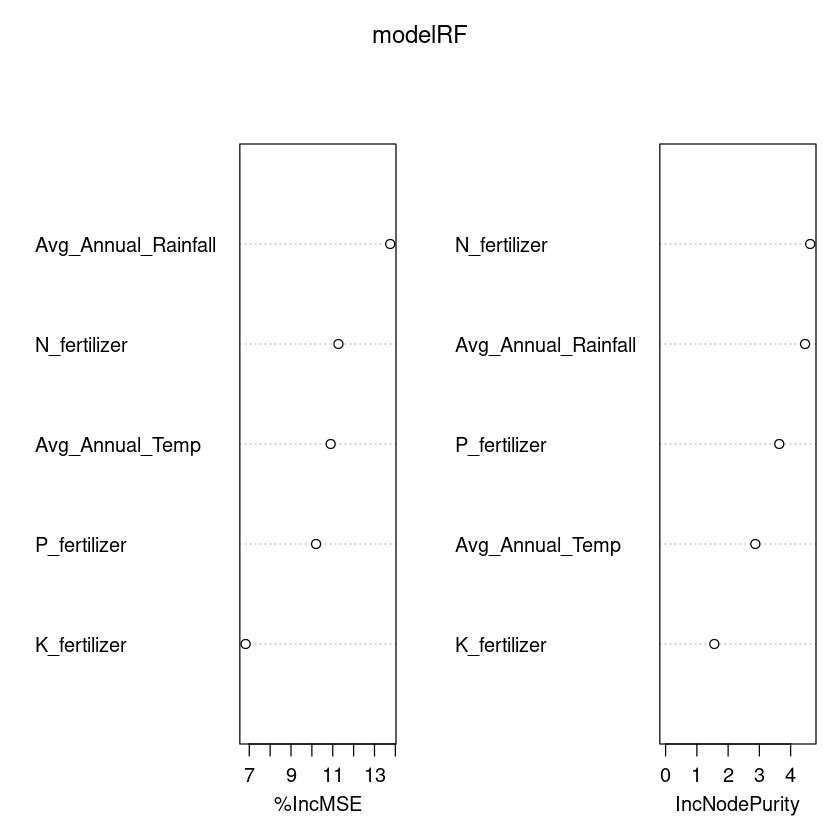

In [34]:
importance(modelRF) # returns the importance of the variables : most siginificant - cp followed by thalach and so on......
varImpPlot(modelRF) # visualizing the importance of variables of the model.

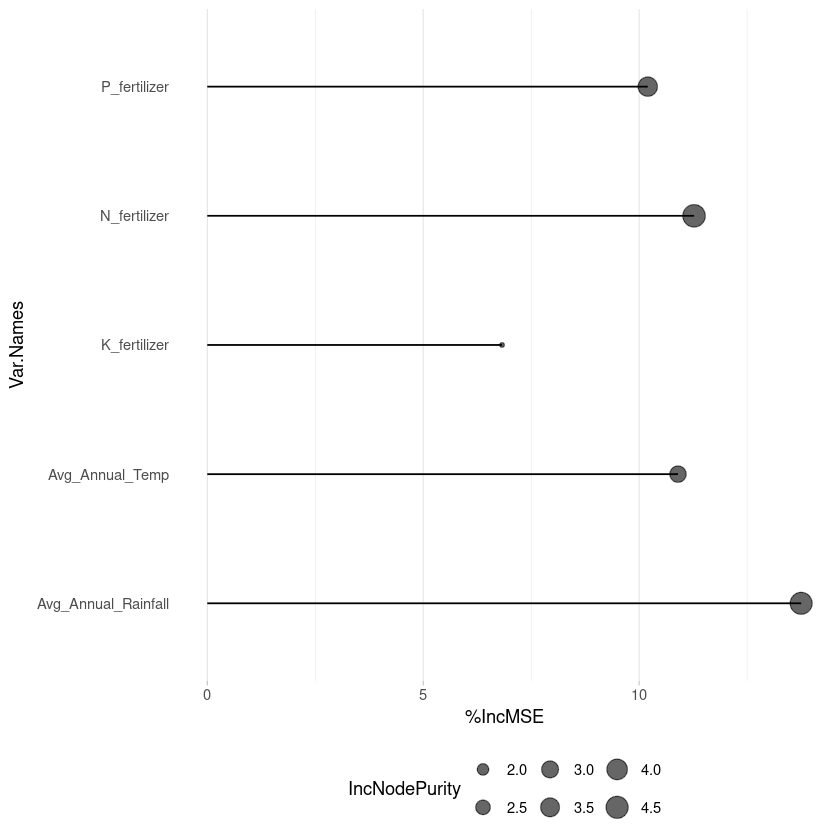

In [35]:
# Get variable importance from the model fit
ImpData <- as.data.frame(importance(modelRF))
ImpData$Var.Names <- row.names(ImpData)

ggplot(ImpData, aes(x=Var.Names, y=`%IncMSE`)) +
geom_segment(aes(x=Var.Names, xend=Var.Names, y=0, yend=`%IncMSE`), color="black") +
geom_point(aes(size = IncNodePurity), color="black", alpha=0.6) +
theme_light() +
coord_flip() +
theme(
legend.position="bottom",
panel.grid.major.y = element_blank(),
panel.border = element_blank(),
axis.ticks.y = element_blank()
)

## Machine learning training: Support Vector Regressor (SVR)

### Train 

In [36]:
modelSVR = svm(data_train$yield ~ ., data=data_train) 

### Predict

In [37]:
pred_SVR = predict(modelSVR, newdata=data_test)

### Evaluation: using root mean squared error (RMSE)

In [38]:
RMSE_SVR = sqrt(mean((pred_SVR-data_test$yield)^2))
print(RMSE_SVR)

[1] 0.133647


## Machine learning training: Decision Tree Regressor

### Train

In [39]:
modelDT = rpart(formula = data_train$yield ~., data = data_train)

### Predict

In [40]:
pred_DT = predict(modelDT, newdata=data_test)

### Evaluation: using root mean squared error (RMSE)

In [41]:
RMSE_DT = sqrt(mean((pred_DT-data_test$yield)^2))
print(RMSE_DT)

[1] 0.1241691


### Hyper-parameter Optimization of Decision Trees

In [42]:
modelDT_Opt <- rpart(
    formula = data_train$yield ~., data = data_train,
    method  = "anova", 
    control = list(minsplit = 2, maxdepth = 20, xval = 10)
)

### Predict

In [43]:
pred_DT = predict(modelDT_Opt, newdata=data_test)

### Evaluation: using root mean squared error (RMSE)

In [44]:
RMSE_DT_Opt = sqrt(mean((pred_DT-data_test$yield)^2))
print(RMSE_DT_Opt)

[1] 0.1241691


## Comparing Performances of Shallow Machine Learning Models

In [45]:
Models = c("Random Forest","Support Vector Regression","Decision Trees","Decision Trees (Opimized)")
Scores = c(RMSE_RF, RMSE_SVR, RMSE_DT, RMSE_DT_Opt)

#Create data scores
data_scores <- data.frame(Models,Scores)

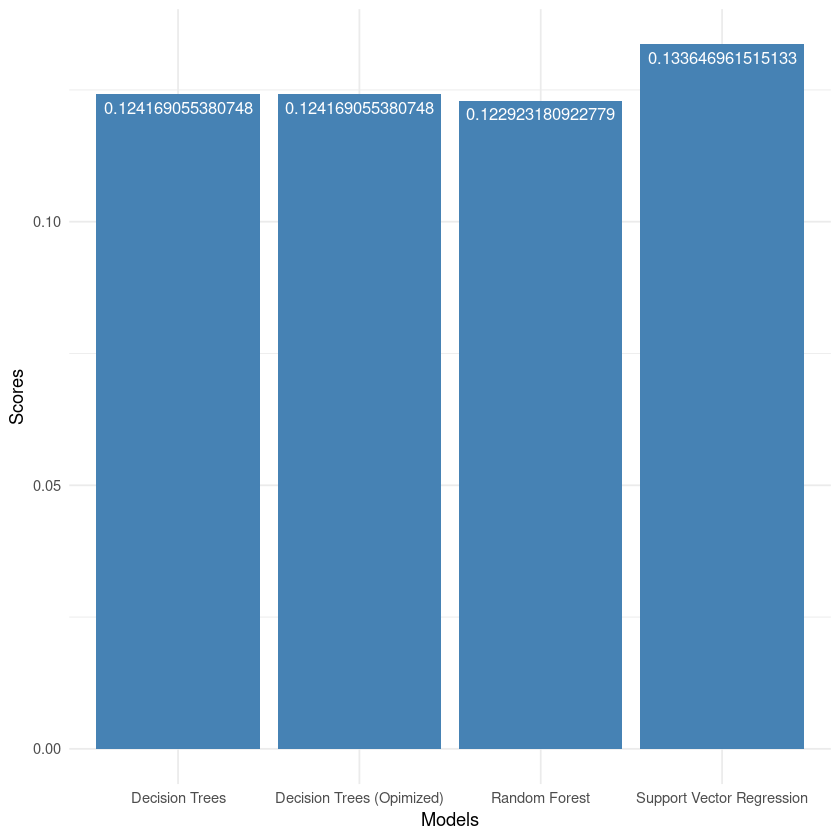

In [46]:
# Barplot
ggplot(data=data_scores, aes(x=Models, y=Scores)) +
  geom_bar(stat="identity", fill="steelblue") +
  geom_text(aes(label=Scores), vjust=1.6, color="white", size=3.5) +
  theme_minimal()

## Save train an test datasets for subsequent modelling 

In [47]:
write.csv(data_train,file='data_train.csv')
write.csv(data_test,file='data_test.csv')